In [49]:
# X,Y : 이동평균선 기준. X가 Y를 상승돌파시 매수신호, X가 Y를 하락돌파시 매도신호
# Z : df.index 중 시작일

# Z값 분류
# 0 : 1990-1-3
# 2888 : 2000-1-4
# 3129 : 2001-1-4
# 3619 : 2003-1-2
# 4115 : 2005-1-3
# 4611 : 2007-1-2
# 5105 : 2009-1-2
# 5609 : 2011-1-3
# 6105 : 2013-1-2
# 6352 : 2014-1-2
# 6597 : 2015-1-2
X=10
Y=20
Z=45
A=0

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# 파일 불러오기
path=r'C:\Users\sw.shin\Desktop\sw.shin\06_코딩\연습용 자료들\03_KOSPI200,F-KOSPI200(2007~).xlsx'
df=pd.read_excel(path, sheet_name='KOSPI 200', index_col=0)
df

,KOSPI 200
D A T E,
2007-01-02,185.70
2007-01-03,182.13
2007-01-04,180.52
2007-01-05,179.10
2007-01-08,177.08
...,...
2019-12-04,274.15
2019-12-05,273.30
2019-12-06,276.56


In [52]:
df.index[A]

Timestamp('2007-01-02 00:00:00')

In [53]:
df=df[A:]
df

,KOSPI 200
D A T E,
2007-01-02,185.70
2007-01-03,182.13
2007-01-04,180.52
2007-01-05,179.10
2007-01-08,177.08
...,...
2019-12-04,274.15
2019-12-05,273.30
2019-12-06,276.56


In [54]:
# F-KOSPI 200 붙이기
dg=pd.read_excel(path, sheet_name='F-KOSPI 200', index_col=0)
df['F-KOSPI 200']=dg
df=df[:-2]
df

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,KOSPI 200,F-KOSPI 200
D A T E,,
2007-01-02,185.70,1000.00
2007-01-03,182.13,983.96
2007-01-04,180.52,971.66
2007-01-05,179.10,960.16
2007-01-08,177.08,951.07
...,...,...
2019-12-02,277.44,1348.90
2019-12-03,276.19,1341.13
2019-12-04,274.15,1334.09


In [55]:
# KOSPI 200의 일간 수익률,MA_X, MA_Y 구하기,
df['KOSPI 200 daily return']=df['KOSPI 200'].pct_change()
df['F-KOSPI 200 daily return']=df['F-KOSPI 200'].pct_change()
df['MA'+str(X)]=df['KOSPI 200'].rolling(window=X).mean()
df['MA'+str(Y)]=df['KOSPI 200'].rolling(window=Y).mean()
df['MA'+str(Z)]=df['KOSPI 200'].rolling(window=Z).mean()
df

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA10,MA20,MA45
D A T E,,,,,,,
2007-01-02,185.70,1000.00,NaN,NaN,NaN,NaN,NaN
2007-01-03,182.13,983.96,-0.019225,-0.016040,NaN,NaN,NaN
2007-01-04,180.52,971.66,-0.008840,-0.012501,NaN,NaN,NaN
2007-01-05,179.10,960.16,-0.007866,-0.011835,NaN,NaN,NaN
2007-01-08,177.08,951.07,-0.011279,-0.009467,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-02,277.44,1348.90,0.002385,0.001084,280.847,282.4525,277.900444
2019-12-03,276.19,1341.13,-0.004505,-0.005760,279.843,282.0430,278.008444
2019-12-04,274.15,1334.09,-0.007386,-0.005249,279.037,281.5245,278.021778


In [56]:
# 매수신호, 매도신호 입력
df2=df[Z-1:-1]
df2['매수신호']='No'
df2['매도신호']='No'
df2['보유여부']='No'

#상방 돌파신호
for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1], 'MA'+str(X)]>df2.loc[df2.index[i-1],'MA'+str(Z)]: 
        if df2.loc[df2.index[i-1],'MA'+str(X)]<df2.loc[df2.index[i-1],'MA'+str(Y)]:
            if df2.loc[df2.index[i],'MA'+str(X)]>df2.loc[df2.index[i],'MA'+str(Y)]:
                df2.loc[df2.index[i], '매수신호']='Yes'

#하방 돌파신호
for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]<df2.loc[df2.index[i-1],'MA'+str(Z)]:
        if df2.loc[df2.index[i-1],'MA'+str(X)]>df2.loc[df2.index[i-1],'MA'+str(Y)]:
            if df2.loc[df2.index[i],'MA'+str(X)]<df2.loc[df2.index[i],'MA'+str(Y)]: 
                df2.loc[df2.index[i], '매도신호']='Yes'
            
df2

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA10,MA20,MA45,매수신호,매도신호,보유여부
D A T E,,,,,,,,,,
2007-03-07,182.36,970.17,0.006235,0.001776,185.334,185.3195,181.736222,No,No,No
2007-03-08,183.94,980.44,0.008664,0.010586,184.938,185.2620,181.697111,No,No,No
2007-03-09,183.87,973.86,-0.000381,-0.006711,184.353,185.2220,181.735778,No,No,No
2007-03-12,186.36,987.56,0.013542,0.014068,183.970,185.3275,181.865556,No,No,No
2007-03-13,185.72,984.66,-0.003434,-0.002937,183.530,185.3775,182.012667,No,No,No
...,...,...,...,...,...,...,...,...,...,...
2019-11-29,276.78,1347.44,-0.015823,-0.015605,281.821,282.7075,277.843778,No,No,No
2019-12-02,277.44,1348.90,0.002385,0.001084,280.847,282.4525,277.900444,No,No,No
2019-12-03,276.19,1341.13,-0.004505,-0.005760,279.843,282.0430,278.008444,No,No,No


In [57]:
# 보유 종목 선별
for i in range(1,(len(df2))):
    if df2.loc[df2.index[i],'매수신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='KOSPI 200'
    elif df2.loc[df2.index[i],'매도신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='KOSPI 인버스'
    else:
        if df2.loc[df2.index[i-1],'보유여부']=='KOSPI 200':
            df2.loc[df2.index[i],'보유여부']='KOSPI 200'
        elif df2.loc[df2.index[i-1],'보유여부']=='KOSPI 인버스':
            df2.loc[df2.index[i],'보유여부']='KOSPI 인버스'
df2.head(50)

,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA10,MA20,MA45,매수신호,매도신호,보유여부
D A T E,,,,,,,,,,
2007-03-07,182.36,970.17,0.006235,0.001776,185.334,185.3195,181.736222,No,No,No
2007-03-08,183.94,980.44,0.008664,0.010586,184.938,185.2620,181.697111,No,No,No
2007-03-09,183.87,973.86,-0.000381,-0.006711,184.353,185.2220,181.735778,No,No,No
2007-03-12,186.36,987.56,0.013542,0.014068,183.970,185.3275,181.865556,No,No,No
2007-03-13,185.72,984.66,-0.003434,-0.002937,183.530,185.3775,182.012667,No,No,No
2007-03-14,181.81,963.32,-0.021053,-0.021672,182.896,185.3280,182.117778,No,No,No
2007-03-15,184.41,979.92,0.014301,0.017232,183.017,185.3840,182.270889,No,No,No
2007-03-16,184.42,975.70,0.000054,-0.004306,183.181,185.3190,182.480444,No,No,No
2007-03-19,186.31,986.77,0.010248,0.011346,184.043,185.2935,182.703778,No,No,No


In [58]:
# 최소시작일 구하기
start=[]
for i in range(len(df2)):
    if df2.loc[df2.index[i-1],'매수신호']=='No':
        if df2.loc[df2.index[i],'매수신호']=='Yes':
            start.append(i)
start[0]

11

In [64]:
# 포트폴리오 구성
df2['Portfolio']=0
df2.loc[df2.index[0:start[0]+1], 'Portfolio']=1000000
df2.head(40)

# 포트폴리오 운용
# KOSPI 레버리지 보유중일땐, 다음날부터 수익률에 영향을 받음.
#  보유중일 땐 다음날부터 포트폴리오 그대로.
# 인버스 반영계수 = 0  : 인버스 보유 대신 현금보유만 하고 있는 것.
for i in range(start[0],len(df2)-1):
    if df2.loc[df2.index[i],'보유여부']=='KOSPI 200':
        df2.loc[df2.index[i+1], 'Portfolio']=(1+df2.loc[df2.index[i+1],'KOSPI 200 daily return'])*df2.loc[df2.index[i],'Portfolio']
    elif df2.loc[df2.index[i],'보유여부']=='KOSPI 인버스':
        df2.loc[df2.index[i+1],'Portfolio']=(1-0*df2.loc[df2.index[i+1], 'F-KOSPI 200 daily return'])*df2.loc[df2.index[i],'Portfolio']

df2[70:100]

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,KOSPI 200,F-KOSPI 200,KOSPI 200 daily return,F-KOSPI 200 daily return,MA10,MA20,MA45,매수신호,매도신호,보유여부,Portfolio,benchmark
D A T E,,,,,,,,,,,,
2007-06-18,228.80,1200.42,0.018655,0.020583,222.203,217.0365,207.974000,No,No,KOSPI 200,1.222549e+06,1.254661
2007-06-19,229.04,1199.12,0.001049,-0.001083,222.917,218.1540,208.690222,No,No,KOSPI 200,1.223831e+06,1.255977
2007-06-20,226.58,1186.11,-0.010740,-0.010850,223.338,219.0460,209.373111,No,No,KOSPI 200,1.210687e+06,1.242487
2007-06-21,227.81,1194.96,0.005429,0.007461,223.802,219.9020,210.055556,No,No,KOSPI 200,1.217259e+06,1.249232
2007-06-22,224.95,1176.21,-0.012554,-0.015691,224.317,220.5920,210.686222,No,No,KOSPI 200,1.201977e+06,1.233549
2007-06-25,223.40,1165.54,-0.006890,-0.009072,224.818,221.2350,211.266000,No,No,KOSPI 200,1.193695e+06,1.225049
2007-06-26,222.43,1165.80,-0.004342,0.000223,225.067,221.7625,211.884667,No,No,KOSPI 200,1.188512e+06,1.219730
2007-06-27,220.35,1151.74,-0.009351,-0.012060,225.243,222.1770,212.398222,No,No,KOSPI 200,1.177398e+06,1.208324
2007-06-28,222.60,1165.80,0.010211,0.012208,225.057,222.7190,212.931111,No,No,KOSPI 200,1.189420e+06,1.220662


C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


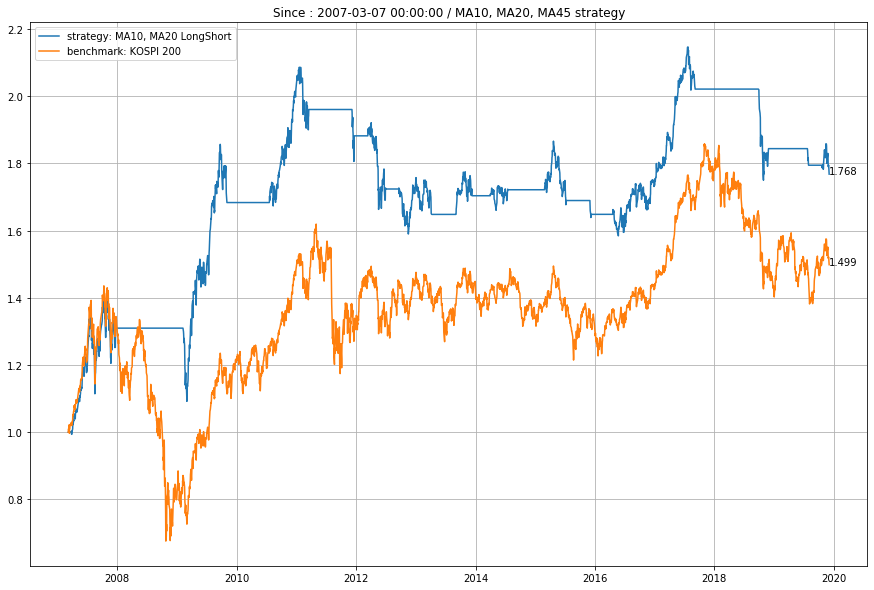

In [65]:
# 그림그리기
df2['benchmark']=df2['KOSPI 200']/df2.loc[df2.index[0],'KOSPI 200']
strategy=df2['Portfolio']/df2.loc[df2.index[0],'Portfolio']
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(strategy, label='strategy: MA'+str(X)+', MA'+str(Y)+' LongShort')
plt.plot(df2['benchmark'], label='benchmark: KOSPI 200')
plt.text(df2.index[-1], strategy[-1], round(strategy[-1],3))
plt.text(df2.index[-1], df2.loc[df2.index[-1],'benchmark'], round(df2.loc[df2.index[-1],'benchmark'],3))
plt.title("Since : "+str(df2.index[0])+" / MA"+str(X)+", MA"+str(Y)+", MA"+str(Z)+" strategy")
plt.legend()